In [9]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [10]:
# Carregamento dos dados do dataset Wine
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')
df = pd.concat([X, y], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
# Estatísticas descritivas do dataset
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [12]:
# (Célula reservada para código adicional, se necessário)

In [13]:
# Transformações nos dados
# Normalização da coluna 'alcohol'
df['alcohol_norm'] = (df['alcohol'] - df['alcohol'].mean()) / df['alcohol'].std()

# Remoção de instâncias com 'malic_acid' acima do 90º percentil
limite = df['malic_acid'].quantile(0.90)
df = df[df['malic_acid'] <= limite]

df.shape

(160, 15)

In [14]:
# Separação das variáveis preditoras e alvo
X = df.drop(columns=['target'])
y = df['target']

# Divisão dos dados em treino (60%), validação (20%) e teste (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

X_train.shape, X_val.shape, X_test.shape

((96, 14), (32, 14), (32, 14))

In [15]:
# Treinamento do modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Visualização da Árvore de Decisão
A seguir, é apresentada a visualização gráfica da árvore de decisão treinada para facilitar a interpretação do modelo.

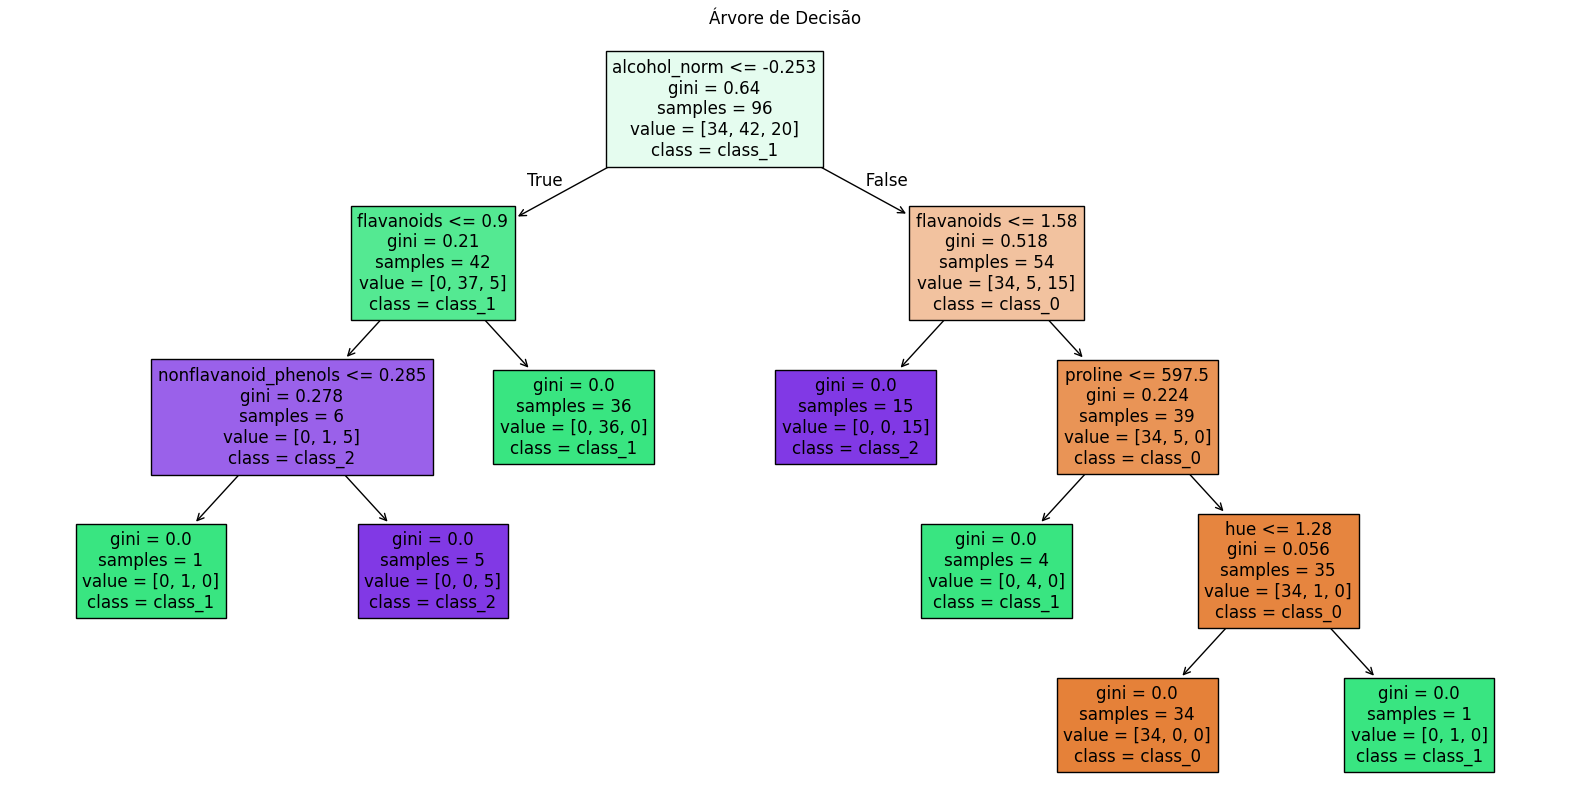

In [16]:
# Visualização gráfica da árvore de decisão treinada
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=wine.target_names, filled=True)
plt.title("Árvore de Decisão")
plt.show()

Acurácia na validação: 0.91


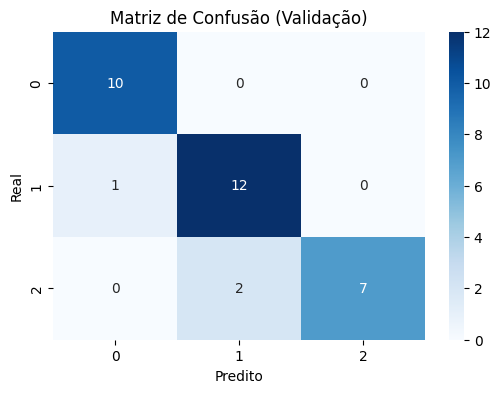

In [17]:
# Avaliação do modelo no conjunto de validação
y_pred_val = model.predict(X_val)
acc = accuracy_score(y_val, y_pred_val)
cm = confusion_matrix(y_val, y_pred_val)

print(f"Acurácia na validação: {acc:.2f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão (Validação)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [18]:
# Predição da classe para a primeira amostra do conjunto de teste
sample = X_test.iloc[[0]]
predicted_class = model.predict(sample)[0]
print("Classe predita para primeira amostra do conjunto de teste:", predicted_class)

Classe predita para primeira amostra do conjunto de teste: 1
